In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
G = nx.DiGraph() # Grafo direcionado

In [55]:
data = "twitter"

for file in os.listdir(data):
    if file.endswith(".edges"):
        node_id = file.split(".")[0] # Node Id do nome do arquivo
        file_path = os.path.join(data, file)

        with open(file_path, "r") as f:
            for line in f:
                connection_node = line.strip()
                if connection_node:
                    G.add_edge(node_id, connection_node) # Adiciona a aresta ao grafo entre o nó e o nó de conexão

print(f"Grafo criado com {G.number_of_nodes()} nós e {G.number_of_edges()} arestas.")
# Salva o grafo em formato GEXF no diretorio atual do projeto
nx.write_gexf(G, "grafo.gexf")

Grafo criado com 1668858 nós e 2286909 arestas.


In [ ]:
import random

def sample_graph_by_edges(G, num_edges=2000):
    """Seleciona um subconjunto aleatório de arestas e mantém os nós conectados a elas."""
    sampled_edges = random.sample(list(G.edges()), min(num_edges, len(G.edges())))
    
    # Criar um subgrafo apenas com as arestas escolhidas
    G_sample = nx.Graph()
    G_sample.add_edges_from(sampled_edges)

    return G_sample

# Defina quantas arestas deseja manter
num_edges_to_keep = 2000
G_sample = sample_graph_by_edges(G, num_edges=num_edges_to_keep)

print(f"Grafo amostrado com {G_sample.number_of_nodes()} nós e {G_sample.number_of_edges()} arestas.")


Grafo amostrado com 2671 nós e 2000 arestas.


In [53]:
# Detecção de comunidade com louvain ou girvan-newman
# Início do relatório no overleaf
comunidades = nx.algorithms.community.girvan_newman(G)
grupos = []

for com in next(comunidades):
    grupos.append(list(com))

print(len(grupos))

KeyboardInterrupt: 

In [ ]:
# Cores infinitas para o grafo ficar bonito
color_palette = sns.color_palette("hsv", len(grupos))
color_map = {i: color_palette[i] for i in range(len(grupos))}

cores = []
for vertice in G:
    for idx, grupo in enumerate(grupos):
        if vertice in grupo:
            cores.append(color_map[idx])
            break
    else:
        cores.append("gray")

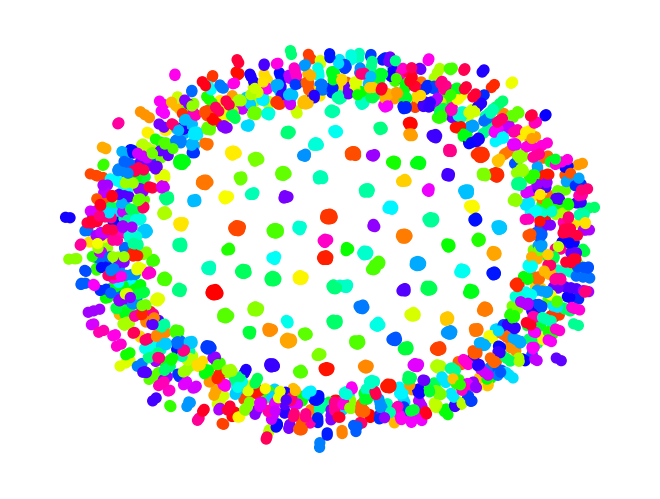

In [ ]:
nx.draw(G, node_color=cores, node_size=50)
plt.show()

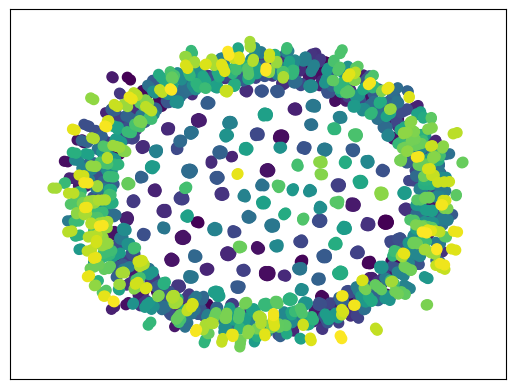

In [ ]:
# return partition as a list of sets
partition = nx.algorithms.community.louvain_communities(G)

# Map each node to its community index
node_to_community = {}
for community_index, community in enumerate(partition):
    for node in community:
        node_to_community[node] = community_index

# visualization
pos = nx.spring_layout(G)
cmap = plt.colormaps.get_cmap('viridis')

In [ ]:
nx.draw_networkx_nodes(
    G, pos, node_to_community.keys(), node_size=50,
    cmap=cmap, node_color=list(node_to_community.values())
)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()